In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn import tree
import plotly.express as px

# Neural Network

In [40]:
# df = pd.read_csv("classification_nonlinear_xor.csv")
# df.loc[ df["y"] == -1, "y"] = 0 
# df.head()

df = pd.read_csv("classification_circle.csv")
df.loc[ df["y"] == -1, "y"] = 0 
df.head()

,x1,x2,y
0,0.385697,1.235308,1
1,0.528159,-1.781597,1
2,0.935817,-1.414600,1
3,0.232862,0.822633,1
4,0.190594,-1.656273,1


In [41]:
feature_cols = ['x1', 'x2']
X = df[feature_cols].to_numpy()
y = df['y'].to_numpy()

In [42]:
%matplotlib notebook
%matplotlib notebook

def animate_nn(i, *fargs):
    clf, X, y, df, xx, yy = fargs
    clf.fit(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.cla()
    plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    alpha = 0.7,
    cmap=plt.cm.Paired #paired
    )
    contours = plt.contour(xx, yy, Z, linewidths=2, colors="white")
    sns.scatterplot(x="x1", y="x2", hue="y", data=df)
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)
    plt.legend(loc='lower right')


<IPython.core.display.Javascript object>


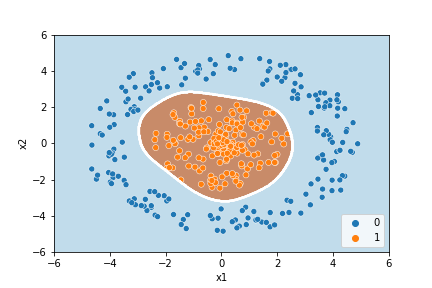

In [43]:
clf = MLPClassifier(activation="tanh", solver='adam', alpha=0.03, hidden_layer_sizes=(8, 4),
                    learning_rate="constant", learning_rate_init=0.001,
                    random_state=42, max_iter=2, warm_start=True)
xx, yy = np.meshgrid(np.linspace(-6, 6, 500), np.linspace(-6, 6, 500))
anim = FuncAnimation(plt.gcf(), func=animate_nn, fargs=(clf, X, y, df, xx, yy), interval=100, frames=200)
plt.show()

# Logistic Regression

In [127]:
df = pd.read_csv("classification_linear_uniform.csv")
df.loc[ df["y"] == -1, "y"] = 0 
df.head()

# df = pd.read_csv("classification_nonlinear_xor.csv")
# df.loc[ df["y"] == -1, "y"] = 0 
# df.head()

,x1,x2,y
0,0.299134,2.291594,1
1,0.700495,0.421917,1
2,3.114521,3.489704,1
3,2.671060,1.629899,1
4,3.035790,1.318322,1


In [128]:
feature_cols = ['x1', 'x2']
X = df[feature_cols].to_numpy()
y = df['y'].to_numpy()

In [129]:
%matplotlib notebook
%matplotlib notebook

def animate_lr(i, *fargs):
    clf, X, y, df = fargs
    clf.fit(X, y)
    
    b = clf.intercept_[0]
    w1, w2 = clf.coef_.T
    b = -b/w2
    theta = -w1/w2

    xmin, xmax = -6, 6
    ymin, ymax = -6, 6
    xd = np.array([xmin, xmax])
    yd = theta*xd + b
    
    plt.cla()
    plt.plot(xd, yd, 'w', lw=3)
    plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.4)
    plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.4)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    sns.scatterplot(x="x1", y="x2", hue="y", data=df)
    plt.legend(loc='lower right')

<IPython.core.display.Javascript object>


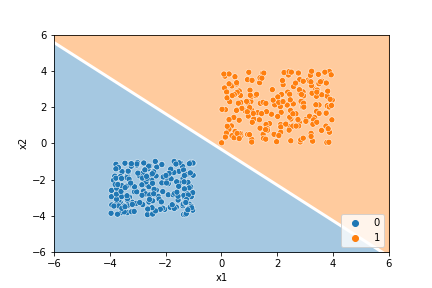

In [130]:
clf = SGDClassifier(loss="log", penalty="none", alpha=0.0001, learning_rate="constant",
                    eta0=0.01, max_iter=1, warm_start=True)
anim = FuncAnimation(plt.gcf(), func=animate_lr, fargs=(clf, X, y, df), interval=200, frames=300)
plt.show()

# Linear Regression

In [17]:
def gradient_descent(X, y, lr=0.001, epoch=12, lmd = 0.01, reg = 'L2'):
    b1, b0 = 0.0, 0.0 # parameters
    b1_list, b0_list = [], []
    log, mse = [], [] # lists to store learning process
    # GRADIENT DESCENT ALGORITHM
    for i in range(epoch):
        sumyhat = 0
        sumxyhat = 0

        reg_grad = 0

        if reg == 'L1':
            reg_grad = lmd
        else:
            reg_grad = 2*b1*lmd

        for j in range(len(X)):
            sumyhat += b0 + b1*X[j] + reg_grad - y[j]
            sumxyhat += (b0 + b1*X[j] + reg_grad - y[j])*(X[j])
        # CALCULATE AND UPDATE b1 AND b0
        b1 -= lr*(1/len(X))*sumxyhat
        b0 -= lr*(1/len(X))*sumyhat
        b1_list.append(b1)
        b0_list.append(b0)

        # COULD HAVE ADDED THE CONDITION HERE
        # BUT MATHEMATICALLY IT SEEMED THAT THE THRESHOLD VALUE WOULD BE DIFFICULT TO ACCURATELY PUT IN
        # AND THE NUMBER OF EPOCHS CHOSEN HERE (20) OR EVEN 10 TIMES HIGHER IS MORE 

        # UPDATE LOGS AND MSES
        log.append((b1, b0))

        reg_term = 0

        if reg == 'L1':
            reg_term = lmd*np.sum(b1)
        else:
            reg_term = lmd*np.sum(b1*b1)

        mse.append(mean_squared_error(y, (b1*X + b0)) + reg_term)        

    return b1, b0, log, mse, b1_list, b0_list

In [18]:
#Loading the datasets

df1 = pd.read_csv("regression_linear_line.csv")
df2 = pd.read_csv("regression_linear_square_root.csv")

In [24]:
dataset = df1 #setting the current dataset

X = np.array(dataset['x'])
y = np.array(dataset['y'])

<IPython.core.display.Javascript object>


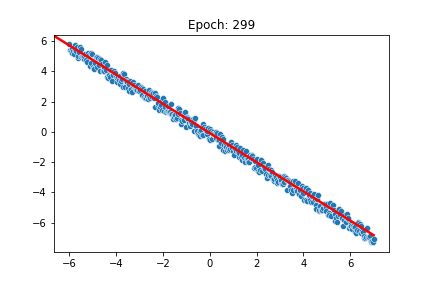

In [26]:
%matplotlib notebook
%matplotlib notebook

epoch =300
alpha = 0.001
lambda_value = 0.01
regularization_type = 'L2'

w, b, _, _, w_list, b_list = gradient_descent(X, y, lr=alpha, epoch=epoch, lmd=lambda_value, reg=regularization_type)

figure, ax = plt.subplots()
sns.scatterplot(x = X, y = y)
x_graph = np.linspace(-7, 7, 100)
y_graph = []

# Since plotting a single graph
line, = ax.plot(0, 0, 'r', linewidth=2.5)

def animation_function(i):
    y_graph = w_list[i-1]*x_graph + b_list[i-1]
    plt.title("Epoch: {}".format(i))
    line.set_xdata(x_graph)
    line.set_ydata(y_graph)
    return line

animation = FuncAnimation(figure,
                        func = animation_function,
                        repeat = False,
                        frames = epoch,
                        interval = 20)
plt.show()

# Linear SVM

In [131]:
# df = pd.read_csv("classification_linear_uniform.csv")
# df.loc[ df["y"] == -1, "y"] = 0 
# df.head()

df = pd.read_csv("classification_nonlinear_xor.csv")
df.loc[ df["y"] == -1, "y"] = 0 
df.head()

,x1,x2,y
0,2.415993,4.922784,1
1,4.489238,3.196620,1
2,4.935055,3.699012,1
3,1.589000,2.737612,1
4,2.112737,1.538858,1


In [132]:
feature_cols = ['x1', 'x2']
X = df[feature_cols].to_numpy()
y = df['y'].to_numpy()

In [133]:
%matplotlib notebook
%matplotlib notebook

def animate_lsvm(i, *fargs):
    clf, X, y, df = fargs
    clf.fit(X, y)
    
    b = clf.intercept_[0]
    w1, w2 = clf.coef_.T
    b = -b/w2
    theta = -w1/w2

    xmin, xmax = -6, 6
    ymin, ymax = -6, 6
    xd = np.array([xmin, xmax])
    yd = theta*xd + b
    
    plt.cla()
    plt.plot(xd, yd, 'w', lw=3)
    plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.4)
    plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.4)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    sns.scatterplot(x="x1", y="x2", hue="y", data=df)
    plt.legend(loc='lower right')

<IPython.core.display.Javascript object>


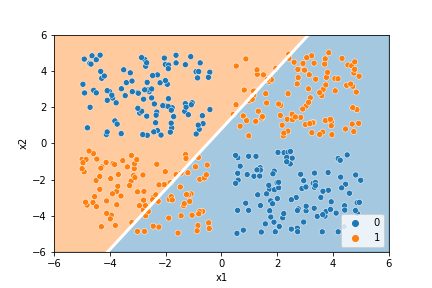

In [134]:
clf = SGDClassifier(loss="hinge", penalty="l2", alpha=0.0001, learning_rate="constant",
                    eta0=0.01, max_iter=1, warm_start=True)
anim = FuncAnimation(plt.gcf(), func=animate_lr, fargs=(clf, X, y, df), interval=200, frames=300)
plt.show()

# SVM

In [40]:
df = pd.read_csv("classification_linear_uniform.csv")
df.loc[ df["y"] == -1, "y"] = 0 
df.head()

,x1,x2,y
0,0.299134,2.291594,1
1,0.700495,0.421917,1
2,3.114521,3.489704,1
3,2.671060,1.629899,1
4,3.035790,1.318322,1


In [41]:
feature_cols = ['x1', 'x2']
X = df[feature_cols].to_numpy()
y = df['y'].to_numpy()

In [42]:
def train_svm(X, y, xx, yy, iterations=100, C=1.0, kernel="rbf", degree=3, max_iter=1):
    clf = SVC(C=1.0, kernel="rbf", degree=3, max_iter=1)
    Z_l = []
    for i in range(iterations):
        clf.fit(X, y)
        Z_l.append(clf.decision_function(np.c_[xx.ravel(), yy.ravel()]))
    return Z_l

In [43]:
%matplotlib notebook
%matplotlib notebook

def animate_svm(i, *fargs):
    X, y, Z_l, df, xx, yy = fargs
    Z = Z_l[i].reshape(xx.shape)
    
    plt.cla()
    plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
    )
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=3, colors="white")
    sns.scatterplot(x="x1", y="x2", hue="y", data=df)
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)
    plt.legend(loc='lower right')

In [45]:
# xx, yy = np.meshgrid(np.linspace(-6, 6, 500), np.linspace(-6, 6, 500))
# Z_l = train_svm(X, y, xx, yy, iterations=100, C=1.0, kernel="rbf", degree=3, max_iter=1)
# anim = FuncAnimation(plt.gcf(), func=animate_svm, fargs=(X, y, Z_l, df, xx, yy), interval=100, frames=200)
# plt.show()

# K-Means

In [34]:
# df = pd.read_csv("classification_linear_uniform.csv")
# xmin, xmax = -6, 6
# ymin, ymax = -6, 6

# df = pd.read_csv("classification_nonlinear_xor.csv")
# xmin, xmax = -6, 6
# ymin, ymax = -6, 6

# df = pd.read_csv("classification_clustering_outliers.csv")
# df["x1"] = df["x"]
# df["x2"] = df["y"]
# df.drop(columns=["x", "y"], inplace=True)
# df.head()
# xmin, xmax = -30, 30
# ymin, ymax = -30, 30

df = pd.read_csv("clustering_4clusters.csv")
xmin, xmax = df["x1"].min(), df["x1"].max() 
ymin, ymax = df["x2"].min(), df["x2"].max()

In [35]:
feature_cols = ['x1', 'x2']
X = df[feature_cols].to_numpy()

In [36]:
def kmeans_cluster_centers(X, xx, yy, n_clusters=2, iterations=100):
    n_centroids = []
    labels = []
    Z_l = []
    centroids = None
    for i in range(iterations):
        clus = KMeans(
            max_iter=1,
            n_init=1,
            init=(centroids if centroids is not None else 'k-means++'),
            n_clusters=n_clusters,
            random_state=1)
        clus.fit(X)
        centroids = clus.cluster_centers_
        n_centroids.append(centroids)
        labels.append(clus.fit_predict(X))
        Z_l.append(clus.predict(np.c_[xx.ravel(), yy.ravel()]))
    return n_centroids, labels, Z_l

In [37]:
def animate_kmeans(i, *fargs):
    n_centroids, labels, Z_l, df, xx, yy, inter = fargs
    
    plt.cla()
    Z = Z_l[i].reshape(xx.shape)
    plt.imshow(
    Z,
    interpolation=inter,
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    alpha=0.5,
    aspect="auto",
    origin="lower",
    )
    sns.scatterplot(x="x1", y="x2", hue=labels[i], palette="deep", data=df)
    centroids = n_centroids[i]
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=80,
        linewidths=3,
        color="black",
        zorder=10,
    )
    plt.legend(loc='lower right')

<IPython.core.display.Javascript object>


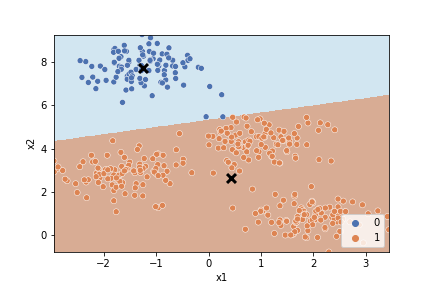

In [39]:
%matplotlib notebook
%matplotlib notebook

xx, yy = np.meshgrid(np.linspace(xmin, xmax, 500), np.linspace(ymin, ymax, 500))
n_centroids, labels, Z_l = kmeans_cluster_centers(X, xx, yy, n_clusters=2, iterations=50)
animation = FuncAnimation(plt.gcf(),
                        repeat=False,
                        func = animate_kmeans,
                        fargs=(n_centroids, labels, Z_l, df, xx, yy, "none"),
                        frames = 100,
                        interval = 800)
plt.show()

# Naive Bayes (non-iterative)

In [164]:
df = pd.read_csv("classification_naive_bayes_bernoulli_independent.csv")
df.loc[ df["y"] == -1, "y"] = 0 
df.head()

,x1,x2,y
0,0.071472,-1.328822,0
1,-0.460676,-0.217974,0
2,-1.474365,-1.406289,0
3,-1.650939,0.934005,0
4,-1.043427,-0.319130,0


In [165]:
feature_cols = ['x1', 'x2']
X = df[feature_cols].to_numpy()
y = df['y'].to_numpy()
clf = GaussianNB()
clf.fit(X, y)

GaussianNB()

<IPython.core.display.Javascript object>


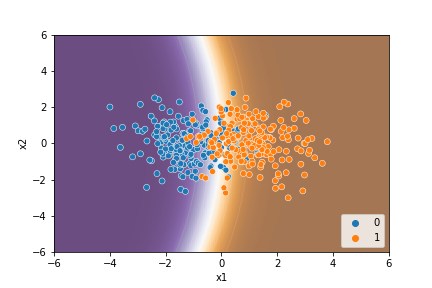

In [166]:
xmin,xmax = -6, 6
ymin,ymax = -6, 6
xx, yy = np.meshgrid(np.linspace(-6, 6, 500), np.linspace(-6, 6, 500))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)


plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
    alpha=0.7
)


contours = plt.contour(xx, yy, Z, linewidths=1, colors="white", alpha=0.1)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
sns.scatterplot(x="x1", y="x2", hue="y", data=df)
plt.legend(loc='lower right')
plt.show()

# Decision Tree Classifier (non-iterative)

In [167]:
# df = pd.read_csv("classification_linear_uniform.csv")
# df.loc[ df["y"] == -1, "y"] = 0 
# df.head()

df = pd.read_csv("classification_nonlinear_xor.csv")
df.loc[ df["y"] == -1, "y"] = 0 
df.head()

,x1,x2,y
0,2.415993,4.922784,1
1,4.489238,3.196620,1
2,4.935055,3.699012,1
3,1.589000,2.737612,1
4,2.112737,1.538858,1


In [168]:
feature_cols = ['x1', 'x2']
X = df[feature_cols].to_numpy()
y = df['y'].to_numpy()
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

<IPython.core.display.Javascript object>


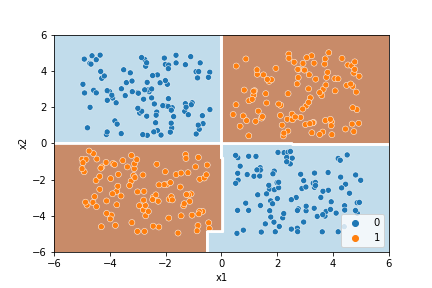

In [169]:
xmin,xmax = -6, 6
ymin,ymax = -6, 6
xx, yy = np.meshgrid(np.linspace(-6, 6, 500), np.linspace(-6, 6, 500))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.Paired,
    alpha=0.7
)


contours = plt.contour(xx, yy, Z, linewidths=2, colors="white", alpha=1)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
sns.scatterplot(x="x1", y="x2", hue="y", data=df)
plt.legend(loc='lower right')
plt.show()

<IPython.core.display.Javascript object>


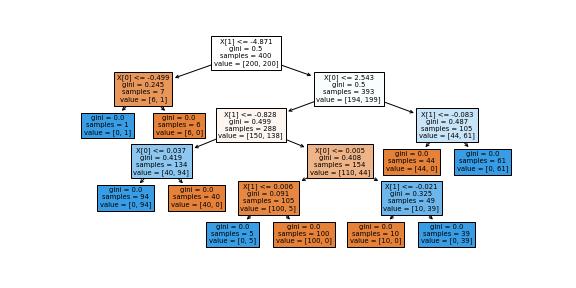

In [170]:
fig = plt.figure(figsize=(8,4))
_ = tree.plot_tree(clf, 
                   filled=True)

# PCA

In [171]:
df = pd.read_csv("classification_linear_uniform.csv")
df.loc[ df["y"] == -1, "y"] = 0 
df.head()

,x1,x2,y
0,0.299134,2.291594,1
1,0.700495,0.421917,1
2,3.114521,3.489704,1
3,2.671060,1.629899,1
4,3.035790,1.318322,1


In [172]:
feature_cols = ['x1', 'x2']
X = df[feature_cols].to_numpy()
y = df['y'].to_numpy()
pca = PCA()
components = pca.fit_transform(X)

In [173]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(2),
    color=df["y"]
)
fig.update_traces(diagonal_visible=False)
fig.show()